# This file includes the genomes that are filtered by genome statistic
- no "plasmid" is included

In [1]:
pan_df = '/home/hermuba/data0118/cdhit/clstr/pangenome_df/Escherichia0.70rm_plasmid.clstr.csv'
from Genome.pangenome_intrinsic_info.count_core_acc import *

In [2]:
count, pan_size, df = gene_distribution(pan_df)

In [3]:
# number of genes
len(count)

31622

In [4]:
# number_of_species
pan_size

1580

In [5]:
df.shape

(31622, 1580)

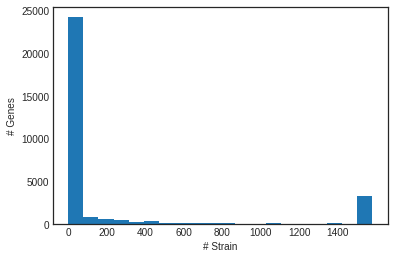

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use("seaborn-white")
fig, ax = plt.subplots()
n, bins, patches = ax.hist(count, bins = 20)
ax.set_xlabel('# Strain')
ax.set_xticks(range(0,1580,200))

ax.set_ylabel('# Genes')

#plt.savefig('/home/hermuba/data0118/fig/gene_prevalance.pdf', format = 'pdf', dpi = 300)

In [11]:
# define core
thres = extended_core(n, bins) # 1563

In [12]:
thres # any gene cluster with more than this gene count (the extended core definition) will be classify as "core"

1500.05

# Remove one genome that has less than 4000 genes
although we use quast to check, quast return NaN in genome stats. That's why we miss it.

In [13]:
df.columns[df.sum(axis = 0)<4000] # only ~400 genes; WTF; annotated as WGS in PATRIC, quast NaN!!! WTF, "PacBio"

Index(['562.22426'], dtype='object')

In [15]:
grow = pangenome_profile(df.iloc[:, :100])

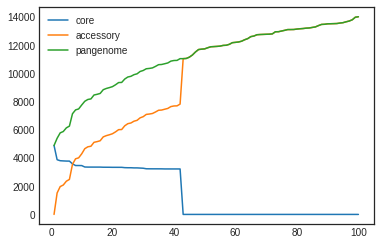

In [16]:
grow.plot() # this growth plot is deprecated because of that pacbio genome!

# Let's remove the PacBio genome and recalculate everything again :)

In [17]:
df.drop(axis = 1, columns = '562.22426', inplace = True)

In [18]:
count = df.sum(axis = 1)
pan_size = df.shape[1]

In [19]:
# count = pangenome size
len(count)

31622

In [20]:
pan_size # removed one genome

1579

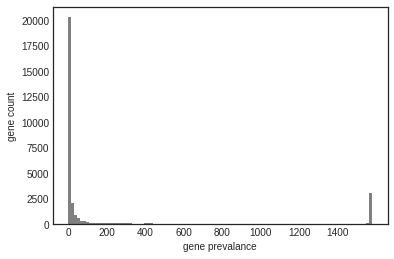

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use("seaborn-colorblind")
fig, ax = plt.subplots()
n, bins, patches = ax.hist(count, bins = 100, color = 'grey')
ax.set_xlabel('gene prevalance')
ax.set_xticks(range(0,1580,200))

ax.set_ylabel('gene count')

plt.savefig('/home/hermuba/data0118/fig/fig_11_gene_prevalance.pdf', format = 'pdf', dpi = 300)

In [22]:
# define core
thres = extended_core(n, bins) # 1563

In [23]:
thres

1563.2099999999998

# permute the order of the genome to get the confidence interval of genome

In [24]:
import numpy as np
results = []
for n_iter in range(20):
    genome_order = np.random.permutation(df.shape[1])
    permuted = df.iloc[:, genome_order]
    grow = pangenome_profile(permuted)
    results.append(grow.values) # append stats into np

In [25]:
test = np.array(np.stack(results),dtype=np.float64) # weird bug

grow_mean = np.mean(np.stack(results), axis = 0)
grow_std = np.nanstd(test, axis = 0)

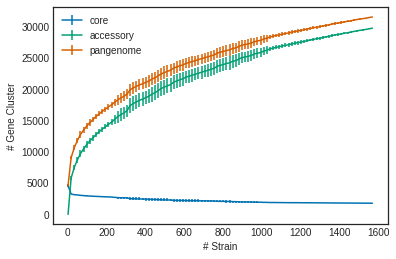

In [26]:
fig, ax = plt.subplots()
ax.set_xlabel('# Strain')
ax.set_ylabel('# Gene Cluster')

x = grow.index
i = 0
for label in grow.columns:
    
    ax.errorbar(x = x, y = grow_mean[:,i], yerr = grow_std[:,i], label = label)
    i+= 1
plt.legend()
plt.savefig('/home/hermuba/data0118/fig/fig_10_pangenome_growth.pdf', format = 'pdf', dpi = 300)

In [27]:
pangenome_stats = pd.DataFrame(np.concatenate([grow_mean, grow_std], axis = 1), index = grow.index, columns = list(grow.columns)*2)

In [28]:
pangenome_stats.to_csv('~/data0118/fig/pangenome_stat.csv')

In [29]:
# core genome size
sum_df = df.sum(axis = 1)
len(sum_df.loc[sum_df >= thres])

3094

In [30]:
len(sum_df.loc[sum_df < thres]) # accessory

28528

In [31]:
len(sum_df)

31622

# Summary:
- genome inclusion criteria: no plasmid, remove 1 PacBio genome with less than 4000 genes by hand.
- No. strain = 1579
- Pangenome size = 31622
- Core definition: Extended core (99%)
- Number of core: 3094
- Number of accessory: 28328